In [12]:
import pandas as pd 
import numpy as np
df = pd.read_csv('total_data_na.csv')

/tmp/ipykernel_214319/2328060515.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('-', np.nan, inplace=True)


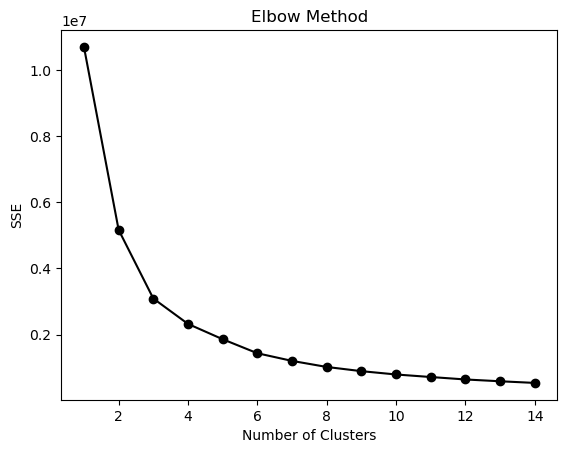

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X= df[['Runs.x', 'HS', 'Avg.x', 'BF', 'SR.x', 'X100', 'X50', 'Runs.y', 'Wkts', 'BBI', 'Avg.y', 'Econ', 'SR.y']]
X.replace('-', np.nan, inplace=True)
X=X.ffill()
# Elbow method to find the optimal number of clusters
sse = []
for k in range(1, 15): # Assuming a maximum of 12 clusters for a balanced team
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10, max_iter=1000)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 15), sse, marker='o', color='black')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Choose the optimal number of clusters based on the elbow plot
optimal_k = 5 # Example: choosing 4 clusters for a balanced team

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
kmeans.fit(X)

# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_


In [14]:

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

df = pd.read_csv('total_data_na.csv')
df['position'] = ['opener', 'middle-order', 'all-rounder', 'bowler'] * (len(df) // 4)

# Check if the length of values matches the length of index
if len(df['position']) != len(df.index):
    df = df.iloc[:len(df['position'])]

df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Normalization
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# # Fill missing values with mean
# df['Avg.x'] = pd.to_numeric(df['Avg.x'], errors='coerce')
# df['Avg.y'] = pd.to_numeric(df['Avg.y'], errors='coerce')
# df['SR.y'] = pd.to_numeric(df['SR.y'], errors='coerce')
# df.isnull().sum()

# Drop unnecessary columns
df.drop(['BBI', 'y', 'PLAYER'], axis=1, inplace=True)

# Step 2: Clustering Analysis
# List to store inertia values for different K values
interclusterdistance = []

# Iterating over 1 to 9 clusters
for i in range(1, 9):
    k = KMeans(n_clusters=i)
    k.fit(df)
    interclusterdistance.append(k.inertia_)

# Fitting KMeans with K=3 and K=2 for demonstration
k = KMeans(n_clusters=3)
k.fit(df)
print("Labels with K=3:", k.labels_)

k = KMeans(n_clusters=2)
k.fit(df)
print("Labels with K=2:", k.labels_)

# Step 3: Formation of a Balanced Cricket Team
# Assuming 'k' is the KMeans object with the optimal number of clusters
# and 'df' is your preprocessed DataFrame

# Get the cluster labels
labels = k.labels_

# Function to select players based on their position and type
def select_players(position, player_type):
    selected_players = df[(df['position'] == position) & (df['type'] == player_type)]
    return selected_players

# Selecting players
top_order_batsmen = select_players('opener', 'batsman')
middle_order_batsmen = select_players('middle-order', 'batsman')
all_rounders = select_players('all-rounder', 'all-rounder')
bowlers = select_players('bowler', 'bowler')

# Ensure the team has 12 players
# This is a simplified example; you might need to adjust the logic based on your dataset
team = pd.concat([top_order_batsmen, middle_order_batsmen, all_rounders, bowlers])
team = team.sample(n=12, random_state=42) # Randomly selecting 12 players

print("Team:")
print(team)


ValueError: Length of values (140) does not match length of index (143)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data from the CSV file
data = pd.read_csv("total_data_na.csv")

# Preprocess the data by converting categorical variables into numerical ones
data = pd.get_dummies(data, columns=["PLAYER"])

data.head()


,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,X50,...,PLAYER_Trent Boult,PLAYER_Umesh Yadav,PLAYER_Vi0y Kumar,PLAYER_Vijay Shankar,PLAYER_Virat Kohli,PLAYER_Washington Sundar,PLAYER_Wriddhiman Saha,PLAYER_Yusuf Pathan,PLAYER_Yuvraj Singh,PLAYER_Yuzvendra Chahal
0,10,9,1,134,46,16.75,100,134.00,0,0,...,False,False,False,False,False,False,False,False,False,False
1,12,11,2,480,90,53.33,275,174.54,0,6,...,False,False,False,False,False,False,False,False,False,False
2,3,3,2,63,46,63,33,190.90,0,0,...,False,False,False,False,False,False,False,False,False,False
3,15,14,1,370,65,28.46,313,118.21,0,1,...,False,False,False,False,False,False,False,False,False,False
4,6,6,0,148,45,24.66,118,125.42,0,0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv("total_data_na.csv")

# Select relevant features for clustering
features = data[['Runs.x', 'HS', 'Avg.x', 'BF', 'SR.x', 'X100', 'X50', 'Runs.y', 'Wkts', 'BBI', 'Avg.y', 'Econ', 'SR.y']]

features.replace('-', np.nan, inplace=True)
# Impute missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
features = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)


# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(features_scaled)

# Assign cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Create the balanced cricket team
top_order_batsmen = data[data['Cluster'].isin([0, 1])]
middle_order_batsmen = data[data['Cluster'].isin([2, 3])]
all_rounders = data[data['Cluster'].isin([4, 5])]
bowlers = data[data['Cluster'].isin([6, 7, 8, 9])]

# Select the top players based on the criteria for each role
top_order_batsmen = top_order_batsmen.nlargest(3, ['Runs.x'])
middle_order_batsmen = middle_order_batsmen.nlargest(2, ['Runs.x'])
all_rounders = all_rounders.nlargest(3, ['Runs.x', 'Wkts'])
bowlers = bowlers.nlargest(4, ['Wkts', 'BBI'])

# Create the balanced cricket team
print("Balanced Cricket Team:")

balanced_cricket_team = pd.concat([top_order_batsmen, middle_order_batsmen, all_rounders, bowlers], ignore_index=True)
print(balanced_cricket_team)

Balanced Cricket Team:
              PLAYER  Mat.x  Inns.x  NO  Runs.x   HS  Avg.x   BF    SR.x  \
0   Kane Williamson      17      17   3     735   84   52.5  516  142.44   
1       Lokesh Rahul     14      14   2     659   95  54.91  416  158.41   
2        Jos Buttler     13      13   3     548   95   54.8  353  155.24   
3         Evin Lewis     13      13   0     382   65  29.38  276  138.40   
4     Ajinkya Rahane     15      14   1     370   65  28.46  313  118.21   
5       Rishabh Pant     14      14   1     684  128  52.61  394  173.60   
6      Ambati Rayudu     16      16   2     602  100     43  402  149.75   
7        Chris Gayle     11      11   2     368  104  40.88  252  146.03   
8         Andrew Tye     14       8   2      32   14   5.33   38   84.21   
9        Rashid Khan     17       7   2      59   34   11.8   31  190.32   
10     Siddarth Kaul      0       0   0       0    0      0    0    0.00   
11       Umesh Yadav      0       0   0       0    0      0    0 

/tmp/ipykernel_4427/2709236833.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.replace('-', np.nan, inplace=True)
/home/tazmeen/work/stat-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
print("top_order_batsmen:", top_order_batsmen)
print("middle_order_batsmen:", middle_order_batsmen)
print("all_rounders:", all_rounders)
print("bowlers:", bowlers)

top_order_batsmen:               PLAYER  Mat.x  Inns.x  NO  Runs.x  HS  Avg.x   BF    SR.x  X100  \
42  Kane Williamson      17      17   3     735  84   52.5  516  142.44     0   
48      Lokesh Rahul     14      14   2     659  95  54.91  416  158.41     0   
40       Jos Buttler     13      13   3     548  95   54.8  353  155.24     0   

    ...  Runs.y  Wkts  BBI  Avg.y  Econ  SR.y  X4w  X5w  y Cluster  
42  ...       0     0    0      0   0.0     0    0    0  0       1  
48  ...       0     0    0      0   0.0     0    0    0  0       1  
40  ...       0     0    0      0   0.0     0    0    0  0       1  

[3 rows x 26 columns]
middle_order_batsmen:             PLAYER  Mat.x  Inns.x  NO  Runs.x  HS  Avg.x   BF    SR.x  X100  \
28      Evin Lewis     13      13   0     382  65  29.38  276  138.40     0   
3   Ajinkya Rahane     15      14   1     370  65  28.46  313  118.21     0   

    ...  Runs.y  Wkts  BBI  Avg.y  Econ  SR.y  X4w  X5w  y Cluster  
28  ...       0     0    0  